In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Load the data

In [21]:
#load the data
df=pd.read_csv('/content/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [23]:
#checking for the null values if any
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


# A

In [24]:
# just declaring random seed
np.random.seed(42)

# Select a random sample of 25 patients
sample = df.sample(n=25, random_state=42)

Glucose Stastics calculation in sample

In [25]:
# Glucose statistics for the sample
sample_mean = sample['Glucose'].mean()
sample_max = sample['Glucose'].max()

# Glucose statistics for the entire population
pop_mean = df['Glucose'].mean()
pop_max = df['Glucose'].max()

print("Mean of glucose in a sample", round(sample_mean, 2))
print("Mean of glucose in a entire population", round(pop_mean, 2))
print("Maximum Glucose in the random sample which got generated:", sample_max)
print("Maximum glucose in the entire sample", pop_max)

Mean of glucose in a sample 116.64
Mean of glucose in a entire population 120.89
Maximum Glucose in the random sample which got generated: 183
Maximum glucose in the entire sample 199


visualization for the charts to compare

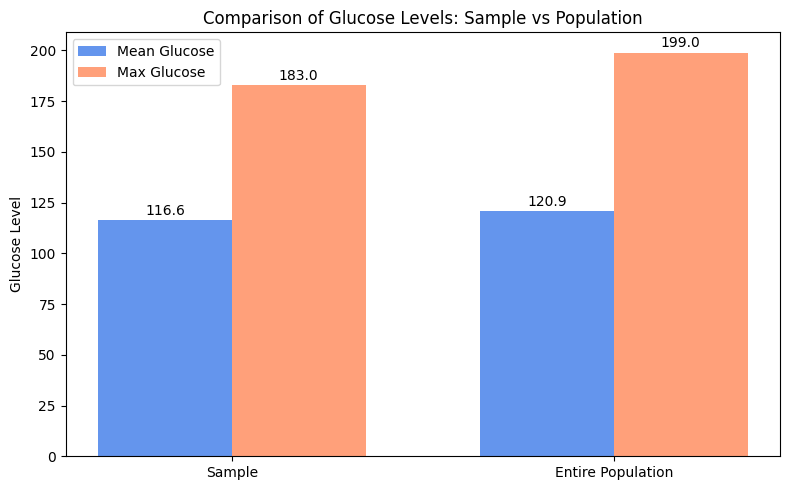

In [26]:
# visualization
labels = ['Sample', 'Entire Population']
means = [sample_mean, pop_mean]
maxes = [sample_max, pop_max]

x = np.arange(len(labels))
width = 0.35

# I am using bar chart to plot
fig, ax = plt.subplots(figsize=(8, 5))
bars1 = ax.bar(x - width/2, means, width, label='Mean Glucose', color='cornflowerblue')
bars2 = ax.bar(x + width/2, maxes, width, label='Max Glucose', color='lightsalmon')

# Adding labels and title to the chart
ax.set_ylabel('Glucose Level')
ax.set_title('Comparison of Glucose Levels: Sample vs Population')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Display values on top of bars mean and max for sample and entire population
for bar in bars1 + bars2:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + 1, f'{height:.1f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()


# B

**98th percentile of sample vs population**

In [27]:
# Compute the 98th percentile for BMI for sample and entire population
sample_98_bmi = np.percentile(sample['BMI'], 98)
pop_98_bmi = np.percentile(df['BMI'], 98)

print("98th Percentile of BMI (For Sample):", round(sample_98_bmi, 2))
print("98th Percentile of BMI (For Entire Population):", round(pop_98_bmi, 2))


98th Percentile of BMI (For Sample): 40.25
98th Percentile of BMI (For Entire Population): 47.53


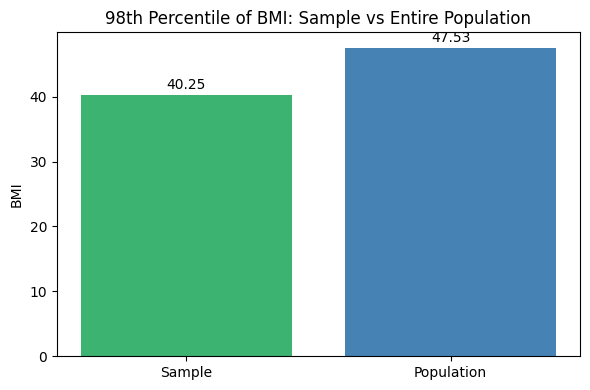

In [28]:
# Data for the plot
labels = ['Sample', 'Population']
percentiles = [sample_98_bmi, pop_98_bmi]

# Create the bar chart
plt.figure(figsize=(6, 4))
bars = plt.bar(labels, percentiles, color=['mediumseagreen', 'steelblue'])

# Adding computed values to labels
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, f'{yval:.2f}', ha='center', va='bottom')

plt.title('98th Percentile of BMI: Sample vs Entire Population')
plt.ylabel('BMI')
plt.tight_layout()
plt.show()


# **C**

In [29]:
# Bootstrap variables
n_iterations = 500
sample_size = 150
#list to store data
boot_means = []
boot_stds = []
boot_98th = []

# Bootstrap loop for 500 iterations
for _ in range(n_iterations):
    sample = df['BloodPressure'].sample(n=sample_size, replace=True)
    boot_means.append(sample.mean())
    boot_stds.append(sample.std())
    boot_98th.append(np.percentile(sample, 98))

# Mean of bootstrap results
mean_boot = np.mean(boot_means)
std_boot = np.mean(boot_stds)
p98_boot = np.mean(boot_98th)

# printing population values
mean_pop = df['BloodPressure'].mean()
std_pop = df['BloodPressure'].std()
p98_pop = np.percentile(df['BloodPressure'], 98)

print("Mean - Bootstrap:", round(mean_boot, 2), "|Entire Population:", round(mean_pop, 2))
print("Standard Dev - Bootstrap:", round(std_boot, 2), "|Entire Population:", round(std_pop, 2))
print("98th Percentile - Bootstrap:", round(p98_boot, 2), "|Entire Population:", round(p98_pop, 2))

Mean - Bootstrap: 69.18 |Entire Population: 69.11
Standard Dev - Bootstrap: 19.07 |Entire Population: 19.36
98th Percentile - Bootstrap: 97.9 |Entire Population: 99.32


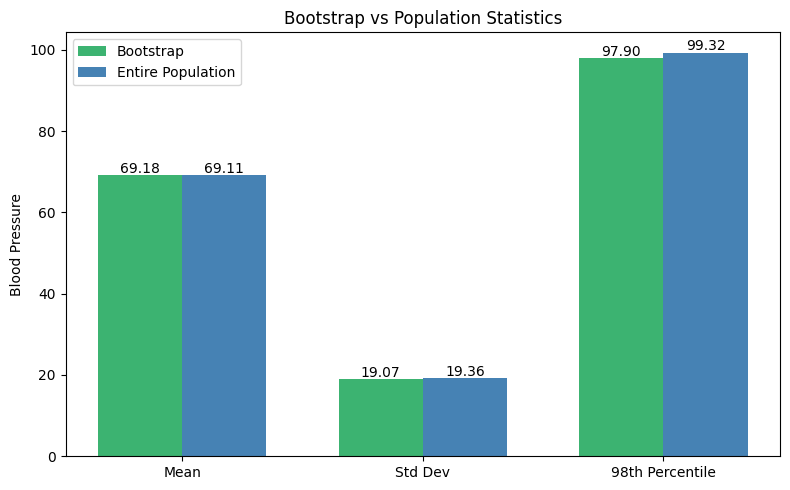

In [30]:
# Labels and values
labels = ['Mean', 'Std Dev', '98th Percentile']
bootstrap = [mean_boot, std_boot, p98_boot]
population = [mean_pop, std_pop, p98_pop]

x = np.arange(len(labels))
width = 0.35

# Plot
plt.figure(figsize=(8, 5))
plt.bar(x - width/2, bootstrap, width, label='Bootstrap', color='mediumseagreen')
plt.bar(x + width/2, population, width, label='Entire Population', color='steelblue')

# labeling bar with values
for i in range(len(labels)):
    plt.text(x[i] - width/2, bootstrap[i] + 0.5, f'{bootstrap[i]:.2f}', ha='center')
    plt.text(x[i] + width/2, population[i] + 0.5, f'{population[i]:.2f}', ha='center')

plt.xticks(x, labels)
plt.ylabel('Blood Pressure')
plt.title('Bootstrap vs Population Statistics')
plt.legend()
plt.tight_layout()
plt.show()
